# Background: Emission and Absorption Lines

The electrons in atoms and molecules are **quantized**. Meaning that each energy level has a specific amount of energy associated with it. For example, Hydrogen gas is quantized as such:

![alt text](energy_level.png "Title")

https://www.researchgate.net/figure/b-Graph-of-energy-levels-in-a-hydrogen-atom-Axis-in-red-Points-in-blue-Young-and_fig17_321722770

**NOTE**: The science behind why the energy levels are quantized is in the realm of Quantum Mechanics. It might be too long and complex to explain everything in this notebook. If you are interested, I think this is a pretty good source for a quick overview without getting into the mathematical rigors of QM: https://phys.libretexts.org/Courses/University_of_California_Davis/UCD%3A_Physics_7C_-_General_Physics/08._Waves/8.3%3A_Quantum_Mechanics/2._Quantized_Energies

**n** represents the energy level. **eV** stand for electron-volt, another measurement for energy. Notice how each number on the right is very specific, down to the second decimal place. This is what quantized means! 

You might also notice two other things: **energy is negative** and **the different series**. The negative energy tells us how much energy is required for electron of a Hydrogen atom to move between different energy levels. For example, if you want to move from n=1 to n=2, you would need -3.40eV - (-13.60eV) = **10.2 eV**. Inversely, when it move from n=2 to n=1, the same amount of energy is released.

The series represents the transition that takes place in a different part of the light spectrum. Lyman series produced emission lines in the Ultraviolet (UV) spectrum, the Balmer series produced lines in the visible spectrum, and Paschen produced lines in the Infrared (IR) spectrum. 

You would need to give a specific amount of energy to make electrons move up an energy level (i.e. 10.2eV to go from n=1 to n=2). However, when the electron moves down an energy level, the same amount of energy is emitted as photons (i.e 10.2eV is emitted if the electron goes from n=2 to n=1). This is something called **conservation of energy**.

The relationship between the energy of a photon and its wavelength is given by this formula: 

$E=hf=\frac{hc}{\lambda}$

where **h** is the Planck's constant ($4.1357\times10^{-15} eV s$), **c** is the velocity of light ($3\times10^{8}m/s$) and $\lambda$ is the wavelength in m.

Because electrons absorbed and emitted energy of a very specific value, using the relationship above, you see that each energy will have a corresponding wavelength. This wavelength will show up on spectra as either absorption or emission lines.  

![](emission_vs_absorption.png "Title")

https://byjus.com/physics/difference-between-emission-and-absorption-spectra/

Notice how the colored lines in the emission spectrum and the black lines in the absorption spectrum are at the same location. As if you can combine the two spectrums and get one complete spectrum. This is what I meant when I said that each energy has a corresponding wavelength. **The location of these lines are wavelengths that correspond to the different energies absorbed and emitted by electrons when they move between energy levels.**

Here is another look at a spectrum! 

![alt text](another_spectrum.png "Title")

https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectra_astro_types.html

The spectra we'll be working with are very similar to the Emission Spectrum you see here where each spike corresponds to an emission line. Notice how when you use this kind of spectra, you could see both the wavelengths (location of peaks on the x-axis) of the emission lines as well as the strength (height of peaks on the y-axis) of those emission lines. 

# Background: Data and TREX

The data we'll be using in this project is collected by the TREX survey. The data consist of **36 masks**, each mask usually has around **~100 slits**.

Each mask represents a different region of the Triangulum galaxy that was targeted during the data collection process. The collection process took place in the 2016B, 2018B, 2019B, and 2020B semesters (where B = fall). 

Overview:

>2016B: M33D2A, M33D2B, M33D3A, M33D3B, M33D3D, M33D4A, M33D4B, M33D4C, M33MA1, M33MA2 (600ZD grating)

>2018B: A1M33P, A2M33P, B1M33P, B2M33P, C1M33P, C2M33P, D1M33P, D2M33P, E1M33P, E2M33P, K1M33P (600ZD grating)

>2019B: D1M33R, D2M33R, E1M33R (600ZD grating), E2M33R (1200G grating)

>2020B: pTE1, pTN1a, pTN1b, pTN2a, pTN2b, pTN3, pTN4, pTN5, pTS1, pTS2, pTS3 (1200G grating)

Here you see 600ZD and 1200G, these are the grating of each mask. The dimension of each pixel varies between the two grating:

>Pixels in the 600ZD has dimension of 0.65 Angstroms. 

>Pixels in the 1200G has dimension of 0.33 Angstroms.

**NOTE**: (Angstrom is a measurement for distance commonly used in astronomy. 1 Angstrom = $1\times10^{-10}$ m)

**NOTE**: You can find all the masks in the Shared Drives. Go to SIP 22 AST-06,-09,-10 -> Spec Data and Python Files -> data. Do keep in mind that there are A LOT of files so you DON'T need to download all of them. Only download the mask you're planning on working with. 

# Data Extraction

**The data are stored as FITS files**. FITS files use something called **Header Data Unit (HDU)** to store data. My interpretation of how HDU work is something like this. You have a unit, inside each unit you can store multiple headers, and inside each header is stored some data. An analogy might help. Imagine you have a large box, that's your unit, inside the large box are smaller labeled bags, those bags are the headers, and inside each of those smaller bags are cards, those cards are the data you stored inside each header. 

Since data are stored as FITS files, how do we extract the data within these FITS files? There is a Python library called **Astropy** that provides us with functions to open these FITS files and read them.

## Import and Functions

You always start Python by importing all the libraries you'll need. Some of the most common Python libraries you'll encounter are matplotlib (for making plots) and NumPy (allow you to use arrays and other math tools. Array is SUPER helpful).

Here you see smooth_kevin and py_specrebin_vec, these are Python files (files that end with .py). **One of the features of Python is that it allows you to work with Python files written by other people simply by importing that Python file.** 

In [1]:
import os
import numpy as np 
from astropy.io import fits 
from smooth_kevin import smoother
import py_specrebin_vec
import matplotlib.pyplot as plt 
from matplotlib import rc
path_name = '.'

In [2]:
# Saving the original streams for stdout and stderr. To be used for logging output later
import sys
std_out = sys.stdout; std_err = sys.stderr

The code block below is something called a **Function**. Python Function has two components to it: **a code block representing the function itself** and **a command executing that code block**. Below is the code block representing the function. 

In [3]:
def get_original_data(file_names,mask_name):
    
    tot_flux = []
    tot_wave = []
    tot_ivar = []
    
    for j in range(len(file_names)):
        #read in star data
        h_star = fits.open(path_name + '/' + 'data/{0}'.format(mask_name) + '/' + file_names[j], ignore_missing_end = True)
        
        data_star1 = h_star[1].data
        star_flux1 = data_star1['SKYSPEC'][0]
        star_wave1 = data_star1['LAMBDA'][0]
        star_ivar1 = data_star1['IVAR'][0]
        
        data_star2 = h_star[2].data
        star_flux2 = data_star2['SKYSPEC'][0]
        star_wave2 = data_star2['LAMBDA'][0]
        star_ivar2 = data_star2['IVAR'][0]
        
        
        #combine the blue and red side into one list
        star_flux = np.array(list(star_flux1) + list(star_flux2))
        star_wave = np.array(list(star_wave1) + list(star_wave2))
        star_ivar = np.array(list(star_ivar1) + list(star_ivar2))
        
        if (sum(star_flux) == 0 and sum(star_ivar) == 0 and sum(star_wave) == 0):
            file_name_split = file_names[j].split(".")
            serendip_file_name = "{0}.{1}.{2}.serendip1.{3}.{4}".format(file_name_split[0],file_name_split[1],
                                                                   file_name_split[2],file_name_split[4],file_name_split[5])
            path_to_serendip = fits.open(path_name + '/' + "data/{0}/{1}".format(mask_name,serendip_file_name))
            
            star_flux1_serendip = path_to_serendip[1].data["SKYSPEC"][0]
            star_flux2_serendip = path_to_serendip[2].data["SKYSPEC"][0]
            star_flux_serendip = np.concatenate((star_flux1_serendip,star_flux2_serendip))
            
            star_ivar1_serendip = path_to_serendip[1].data["IVAR"][0]
            star_ivar2_serendip = path_to_serendip[2].data["IVAR"][0]
            star_ivar_serendip = np.concatenate((star_ivar1_serendip,star_ivar2_serendip))
            
            star_wave1_serendip = path_to_serendip[1].data["LAMBDA"][0]
            star_wave2_serendip = path_to_serendip[2].data["LAMBDA"][0]
            star_wave_serendip = np.concatenate((star_wave1_serendip,star_wave2_serendip))
            
            tot_flux.append(star_flux_serendip)
            tot_wave.append(star_wave_serendip)
            tot_ivar.append(star_ivar_serendip)
            
            h_star.close()
        
        else:
            #add to above lists
            tot_flux.append(star_flux)
            tot_wave.append(star_wave)
            tot_ivar.append(star_ivar)

            h_star.close()
        
    return tot_flux, tot_wave, tot_ivar 

In [4]:
def get_exclusions(): # Get file names of slits with strong ISM emission
    filepath = 'ISM_EM_LINES.txt'
    fp = open(filepath)
    all_data = []
    for line in (fp):
        mask_name = line.split(':')[0].split('_')[0]
        slit_number = line.split(':')[1].strip().split(" ")[0]
        if len(slit_number) == 2:
            slit_number = '0' + slit_number
        elif len(slit_number) == 1:
            slit_number = '00' + slit_number
        else:
            pass
        object_id = line.split(':')[1].strip().split()[1]
        data = {}
        data['mask_name'] = mask_name
        data['slit_number'] = slit_number
        data['object_id'] = object_id
        all_data.append(data)
    return all_data # Return file names

In [5]:
def get_files_to_include(folder): 
    #Function design to sort slits into Included, Excluded, and Serendip. Return list of sorted file names.
    import os
    list_of_files_to_include = []
    list_of_files_to_exclude = []
    serendip_files = []
    all_file_names_in_folder = os.listdir('data/{}'.format(folder))
    y = len(all_file_names_in_folder)
    print("The number of files in the folder is {0}".format(y))
    all_data = get_exclusions()
    len_all_data = len(all_data)
    for n in range(y):
        parts_of_file_name = all_file_names_in_folder[n].split(".")
        if parts_of_file_name[0] == 'spec1d': # avoids hidden DS_Store files on my mac
            object_id = parts_of_file_name[3]
            slit_number = parts_of_file_name[2]
            mask_name = parts_of_file_name[1]
            should_include = True
            should_exclude = True
            for k in range(len_all_data):
                if ((object_id == all_data[k]['object_id']) and (slit_number == all_data[k]['slit_number']) and (mask_name == all_data[k]['mask_name'])):
                    should_include = False
                    should_exclude = True
                if 'serendip' in object_id:
                    should_include = False
                    should_exclude = False
            if should_include == True:
                list_of_files_to_include.append(all_file_names_in_folder[n])       
            elif should_exclude == True:
                list_of_files_to_exclude.append(all_file_names_in_folder[n])
            elif should_include == False & should_exclude == False:
                serendip_files.append(all_file_names_in_folder[n])
    
    print('The number of files left after exclusions is {0}'.format(len(list_of_files_to_include)))
    
    return sorted(list_of_files_to_include), sorted(list_of_files_to_exclude), sorted(serendip_files)


In [6]:
def get_slit_nums(files):
    # Return list of slit numbers. Depend on list of files given. 
    slit_nums = []
    
    if len(files) > 1:
    
        for i in range(len(files)):
            parts_of_file_name = files[i].split(".")
            slit_num = parts_of_file_name[2]
            slit_nums.append(int(slit_num))
            
    return slit_nums

Notice in the get_original_data function we used something called "fits" that was imported above in the ***from astropy.io import fits*** code. In this code, we used imported a tool called "fits" from the astropy.io library. This "fits" tool allows us to open FITS files by calling ***fits.open(path_to_file)***

You also notice certain words such as for, in, if, else, and return are highlighted in different colors and in bolded text. 

***for___in___:*** are used to create something called a for loop which allows you to create loops and repeat operations. 

***if___:*** and ***else___:*** are booleans statements which will only activate if it meets a specified condition. 

***return___*** is a statement used in function which will return whatever you specified after the return statement. 

## Setup and Function Call

In the above function, within the parenthesis, you see two variables: file_names and mask_name. **When you write a statement to execute the function, you will need to provide something in place of these two variables in order for the function to run**. One of the variables is mask_name defined below. Here we design it so that you can change it to whatever mask you want to run. Here, we'll just use M33D2A as our example mask.

In [7]:
mask_name = "M33D2A" #change to fit the appropriate mask 

Below we defined the grating of this mask. M33D2A used a 600ZD grating so we write 600. If the mask you're working with a mask that used a 1200G grating, write 1200.

In [8]:
grating = 600 #change between 600 and 1200

Before we go into the next block of codes, let's take a look at the get_exclusions and get_files_to_include functions from above. In get_exclusion, you'll **notice a file titled "ISM_EM_LINES.txt"**. This text file contains a **list of masks and slits that has strong interstellar medium (ISM) emission**. We want to separate slits that has strong ISM emission from those that do not. The purpose of get_exclusions and get_files_to_include functions is to perform this task. 

Below, we execute the get_files_to_include function by provide three variables: list_of_files_to_include, list_of_files_to_exclude, list_of_serendip_files. We ask the get_files_to_include to return three things so we need three variables to store those three things. We then follow by stating the function name and provide any parameters it needs to run, in this case, mask_name. This is how you execute a function.

In [9]:
#filtering files
list_of_files_to_include, list_of_files_to_exclude, list_of_serendip_files = get_files_to_include(mask_name)

# List of file names 
file_names = list_of_files_to_include
file_names_exclude = list_of_files_to_exclude
file_names_serendip = list_of_serendip_files
file_names_all = list_of_files_to_include + list_of_files_to_exclude

The number of files in the folder is 296
The number of files left after exclusions is 163


**"include"** mean that we will use slits in the list to construct a median (we'll get to it soon!). 

**"exclude"** are slits listed in the ISM_EM_LINES.txt file.

**"serendip"** are duplicate files. We don't really work with them.

If we wish to know the specific slit numbers in each list. We would call the get_slit_nums function.

In [10]:
slit_nums = get_slit_nums(file_names) # Slit numbers of slits INCLUDED in the median calculation
slit_nums_exclude = get_slit_nums(file_names_exclude) # Slit numbers of slits EXCLUDED in the median calculation

all_slit_nums = get_slit_nums(file_names_all)

print("Slit # to INCLUDE in median calculation: {0}".format(slit_nums))
print("Slit # to EXCLUDE: {0}".format(slit_nums_exclude))

Slit # to INCLUDE in median calculation: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 51, 52, 56, 57, 58, 59, 60, 65, 66, 68, 72, 73, 74, 76, 80, 81, 84, 85, 87, 90, 91, 92, 93, 96, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 116, 119, 120, 121, 124, 126, 128, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 149, 151, 152, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 173, 177, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 196, 198, 199, 201, 202, 203, 204, 205, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238]
Slit # to EXCLUDE: [29, 49, 50, 53, 54, 55, 61, 64, 67, 69, 70, 71, 75, 77, 78, 79, 82, 83, 86, 88, 94, 95, 100, 103, 113, 114, 115, 117, 118, 122, 123, 125, 127, 129, 132, 140, 146, 147, 148, 150, 153, 

Now we can finally extract our data from the FITS files. **We are interested in three things: the flux (flux), the wavelength (wave), and the inverse variance (ivar)**. So we extract them by executing the get_original_data function. 

**flux, wave, ivar** stores the flux, wavelength, and inverse variance of slits that are "include".

In [11]:
#getting data
#try getting and rebinning all files
flux, wave, ivar = get_original_data(file_names, mask_name) 

**flux_exclude, wave_exclude, and ivar_exclude** store the flux, wavelength, and inverse variance of slits that are "exclude".

In [12]:
#getting all excluded data
flux_exclude, wave_exclude, ivar_exclude = get_original_data(file_names_exclude, mask_name)

# Data Processing

## Rebinning

Now we have the **flux, wavelength, and inverse variance separated into two categories**: those that have strong ISM emission (exclude) and those that do not which we will use to construct a median (include). 

Before we can proceed, we must perform a procedure called **rebinning**. What is rebinning? The wavelength we read directly from the FITS files do NOT span the same range. For example, let's take a look at the wavelength of slit #29 and slit #49. 

In [13]:
print("Flux of #29:",flux_exclude[0]) #flux of M33D2A #29
print("Wavelength of #29:",wave_exclude[0]) #wavelength of M33D2A #29
print("Flux of #49:",flux_exclude[1]) #flux of M33D2A #49
print("Wavelength of #49:",wave_exclude[1]) #wavelength of M33D2A #49
print("How many values does slit #29 have?", len(wave_exclude[0])) #len of M33D2A #29
print("How mant values does slit #49 have?", len(wave_exclude[1])) #len of M33D2A #49

Flux of #29: [-13.871187 -12.095652 -13.499797 ...  48.06494   48.926437  44.418533]
Wavelength of #29: [4355.949 4356.556 4357.163 ... 9586.764 9587.399 9588.035]
Flux of #49: [20.444523 20.587074 15.612398 ... 56.34212  51.242626 49.441093]
Wavelength of #49: [4752.2373 4752.845  4753.453  ... 9984.596  9985.231  9985.867 ]
How many values does slit #29 have? 8192
How mant values does slit #49 have? 8192


**Notice how both slits have 8192 values but the wavelength values in slit #29 and the wavelength values in #49 aren't the same?** 

Let's visualize them!

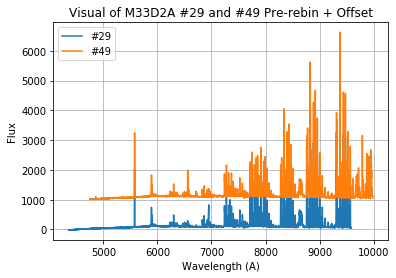

In [14]:
fig,ax = plt.subplots(1)
ax.set_title("Visual of M33D2A #29 and #49 Pre-rebin + Offset")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
ax.plot(wave_exclude[0],flux_exclude[0],label="#29")
ax.plot(wave_exclude[1],flux_exclude[1]+1000,label="#49")
ax.grid(True)
plt.legend()

When we visualize them, you can clearly see that **slit #29 starts and ends earlier than slit #49**. Also, you see that #49 shifted above #29, this is something called an **offset** where we shift something up or down so that is easier to visualize. Is mostly for visual purposes, nothing scientific.

This is what it would look like normally. Very hard to see what's going on!  

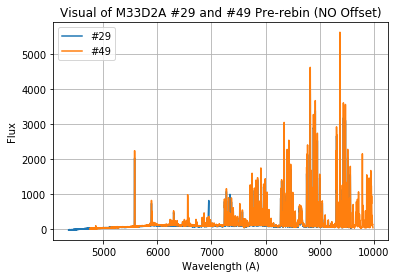

In [15]:
fig,ax = plt.subplots(1)
ax.set_title("Visual of M33D2A #29 and #49 Pre-rebin (NO Offset)")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
ax.plot(wave_exclude[0],flux_exclude[0],label="#29")
ax.plot(wave_exclude[1],flux_exclude[1],label="#49")
ax.grid(True)
plt.legend()

**For our project, it would be much more convenient if their wavelengths span the same range. Which is the purpose of the rebinning process. We essentially make it so that EVERY single slit fits into a pre-determined wavelength template.**

What is the pre-determined wavelength template we want to rebin our wavelength into? We have **two** wavelength templates we want to rebin into. Each depends on the grating of the mask. 

If your mask uses a **600ZD grating**, use **new_wave_600**. If your mask uses a **1200G grating**, use **new_wave_1200**. Notice the **.65 and .33**, they are the **dimension of each pixel**. 

In [16]:
new_wave_600 = np.arange(4000, 11000, .65) 
new_wave_1200 = np.arange(6000, 11000, .33)

Below is a function designed to perform the rebinning process. The main component that really does all the rebinning work is the **py_specrebin_vec** we imported earlier (updated version of py_specrebin).

In [17]:
def rebin(fluxes, waves, ivar, grating):
    # Rebinning function
    rbflux = []
    rbivar = []
    
    if grating == 600:
        new_wave = new_wave_600
    elif grating == 1200:
        new_wave = new_wave_1200
    
    for i in range(len(waves)):
        new_flux,new_ivar = py_specrebin_vec.rebinspec(waves[i],fluxes[i],new_wave,ivar=ivar[i])
        new_flux_err = 1/np.sqrt(new_ivar)

        rbflux.append(new_flux)
        rbivar.append(new_ivar)
        
    return rbflux, new_wave, rbivar

Let's execute the rebin function. Remember that since we separate our data into "include" and "exclude", we will need to call the function twice. 

**NOTE**: The rebinning process always takes a bit of time (usually 5-7 minutes, can be longer or shorter depending on the number of slits). We've been trying to reduce the time required to rebin and this is the best we can get. 

In [18]:
#rebinning the original data
rbflux, rbwave, rbivar = rebin(flux, wave, ivar, grating) # this takes about 4 minutes to run

In [19]:
#rebinning the excluded data
rbflux_exclude, rbwave_exclude, rbivar_exclude = rebin(flux_exclude, wave_exclude, ivar_exclude, grating)

Let's see what slit #29 and #49 look like after it has been rebinned! 

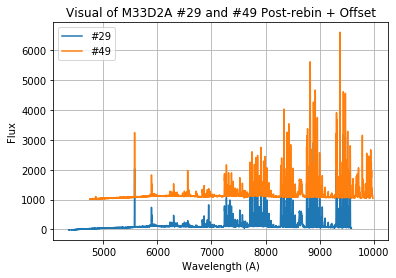

In [20]:
fig,ax = plt.subplots(1)
ax.set_title("Visual of M33D2A #29 and #49 Post-rebin + Offset")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
ax.plot(rbwave_exclude,rbflux_exclude[0],label="#29")
ax.plot(rbwave_exclude,rbflux_exclude[1]+1000,label="#49")
ax.grid(True)
plt.legend()

At first glance, nothing really changed. The overall shape is still the same! Then what really changed then? Let's look at the specific values inside the rebinned wavelength.

In [21]:
print("Rebinned Wavelength of Slit #29:", rbwave_exclude)
print("Rebinned Wavelength of Slit #49:", rbwave_exclude)
print("Wavelength Template for 600ZD:",new_wave_600)
print("How many values does slit #29 have?",len(rbwave_exclude))
print("How many values does slit #49 have?", len(rbwave_exclude))
print("How many values does the wavelength template have?",len(new_wave_600))

Rebinned Wavelength of Slit #29: [ 4000.    4000.65  4001.3  ... 10998.55 10999.2  10999.85]
Rebinned Wavelength of Slit #49: [ 4000.    4000.65  4001.3  ... 10998.55 10999.2  10999.85]
Wavelength Template for 600ZD: [ 4000.    4000.65  4001.3  ... 10998.55 10999.2  10999.85]
How many values does slit #29 have? 10770
How many values does slit #49 have? 10770
How many values does the wavelength template have? 10770


Before rebinning, slit #29 and slit #49 has different wavelength values. Now after rebinning, slit #29, slit #49, and the wavelength template for 600ZD grating are the same. Also, notice how there were only 8192 values pre-rebinning compared to the 10770 values post-rebinning! 

**This is what rebinning does! It takes some template in our case new_wave_600, alters the raw wavelength array of slits so that it fits the range given in the template, then alters the raw flux in a way that the rebinned flux matched the length of the rebinned wavelength WITHOUT altering the shape and features of the original raw data.**

The concept can be a bit difficult to wrap your head around. **Let's try a different approach!**. Imagine you have 8192 dots on your graph and you connect each of them going from left to right to form a spectrum. Now instead of using 8192 dots, you now have 10770 dots you have to plot. There are two conditions: each dots have to be spaced 0.65 Angstrom apart and when they are all connected together, they have to have the same shape as the spectrum you created using 8192 dots. **What rebinning does is determine the x and y coordinates where each of the 10770 dots should go.** 

Before we proceed, I want to show you guys something funky inside the rebinned flux. You might have seen this before and you might encounter it in the future.

In [22]:
print("Rebinned Flux of Slit #29:",rbflux_exclude[0])

Rebinned Flux of Slit #29: [nan nan nan ... nan nan nan]


Do you see those "nan" values? **NaN stands for Not a Number**. There are many ways in which Python can produce NaN results. Python count NaN as a valid value so when you count the length of an array, NaN will be counted. When you plot NaN, Python will register it as a valid operation but nothing will show up since is not a numerical value. When you perform any mathematical operation on NaN, it will produce NaN.

**Just keep in mind that all rebinned flux will have NaN values usually at the beginning and at the end of each array.** 

## Airglow Contamination and Subtraction

The next step after rebinning is **airglow removal**, we sometimes refer to this as **airglow subtraction** or **sky subtraction**. 

**What is airglow?** Airglow emission lines are faint emissions emitted by our own atmosphere that contaminate our spectra. Light from nearby cities or nearby light sources also contaminates our spectra. 

**Why it is necessary to remove them?** All of our data are captured using instruments at the Keck Observatory on Mauna Kea, Hawaii. Because we used ground-based instruments to capture our data, when we aim toward the sky, we end up capturing emission lines from our target, as well as, airglow emission lines and emissions from nearby light sources. We are only interested in emission lines from our target, therefore, we must remove any sort of contamination before we can use the spectra. 

Our approach to airglow removal is fairly simple. **Construct a spectrum that represents the airglow emission lines, then subtract it from every spectrum in that mask**. The remaining spectrum should hypothetically contain only emission lines from our target. 

To construct a spectrum that represents the airglow emission lines, we used spectra that have weak ISM emission, i.e. spectra that are "include" (remember how we separate spectra into "include" and "exclude") and construct something called the **median** which is a spectrum that represents the airglow emission lines. 

Why do we use spectra with weak ISM? Because if they have weak ISM emissions, then emissions in those spectra are mostly caused by airglow or other forms of contamination. 

Remember that after rebinning, all spectra now share the same wavelength array (new_wave_600). As the name implies, you construct the **median** by **going through each pixel in that wavelength array and finding the median flux value at each pixel**. Again, we use a function + function call combo.

In [23]:
def find_median(rebinned_flux_array):
    # Function to calculate median
    median_vals = []
    
    for i in range(len(rebinned_flux_array[0])):

        comp = []
        
        for array in rebinned_flux_array:
            
            if np.isfinite(array[i]) == True:
                comp.append(array[i])
                
        median_vals.append(np.median(comp))
        
    return median_vals

In [24]:
median = find_median(rbflux) #taking the median

Let's display the median spectrum!

Text(0.5, 1.0, 'M33D2A Median Spectrum')

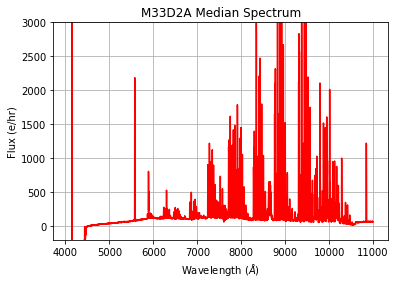

In [48]:
plt.plot(new_wave_600,median,color="red")
plt.ylim(-200,3000)
plt.grid(True)
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux (e/hr)")
plt.title("M33D2A Median Spectrum")

Look a bit identical to spectra such as slit #29 or #49. Some details are very hard to notice without proper subtraction so let's carry out the airglow subtraction on slit #29 and see the results!

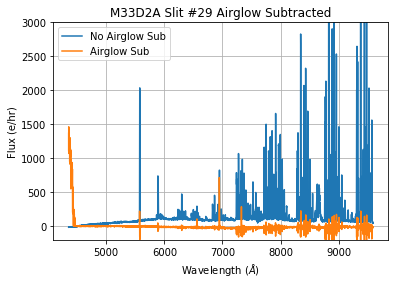

In [47]:
AG_Sub_Slit29 = np.array(rbflux_exclude[0])-np.array(median)
#plt.plot(new_wave_600,median,label="Median Spectrum")
plt.plot(new_wave_600,rbflux_exclude[0],label="No Airglow Sub")
plt.plot(new_wave_600,AG_Sub_Slit29,label="Airglow Sub")
plt.ylim(-200,3000)
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux (e/hr)")
plt.title("M33D2A Slit #29 Airglow Subtracted")
plt.grid(True)
plt.legend()

The blue spectrum is slit #29 before we remove airglow contamination, and the orange spectrum is after we have removed airglow contamination. **Notice how much of our spectra are affected by airglow**. All of those giant blue spikes near the right end are all airglow. **The resulting orange spectrum is the emission spectrum we are interested in**.

Here I'm just showing you one slit for example. We would want to repeat this airglow removal process for every slit in the mask! 

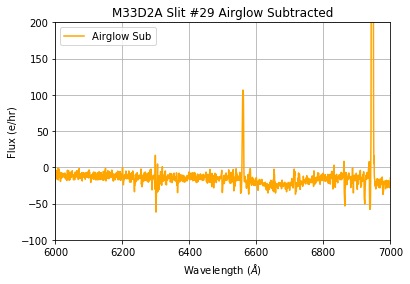

In [42]:
AG_Sub_Slit29 = np.array(rbflux_exclude[0])-np.array(median)
plt.plot(new_wave_600,AG_Sub_Slit29,label="Airglow Sub",color="orange")
plt.xlim(6000,7000)
plt.xlabel("Wavelength ($\AA$)")
plt.ylim(-100,200)
plt.ylabel("Flux (e/hr)")
plt.title("M33D2A Slit #29 Airglow Subtracted")
plt.grid(True)
plt.legend()

Zooming in, you'll see that our spectrum look very similar to the Emission spectrum in the third figure!

## Starlight Contamination and Subtraction

Another thing you have to keep track of is **Starlight Contamination**. As the name implied, is contamination due to lights from stars. Let's take a look at the effects of starlight contamination on our spectra! 

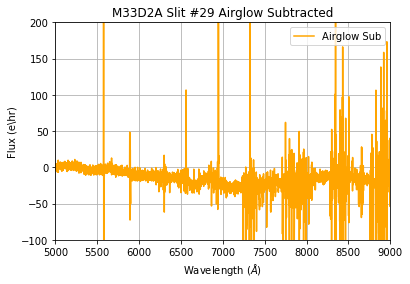

In [43]:
AG_Sub_Slit29 = np.array(rbflux_exclude[0])-np.array(median)
plt.plot(new_wave_600,AG_Sub_Slit29,label="Airglow Sub",color="orange")
plt.xlim(5000,9000)
plt.xlabel("Wavelength ($\AA$)")
plt.ylim(-100,200)
plt.ylabel("Flux (e\hr)")
plt.title("M33D2A Slit #29 Airglow Subtracted")
plt.grid(True)
plt.legend()

Let's use this plot for example! I'm going to draw a black line across it. 

![](Continuum.png)

That black line (I hope you see the trend I'm trying to make with my horribly drawn line) represents something called a **continuum** which is the baseline of our spectrum. We ideally want the continuum to be at 0. However, you see that around 5600 A, our spectrum begins to move away from 0 and dip down. **This deviation from 0 is caused by starlight contamination**.

**In order to remove starlight contamination, you used a method called the moving median**. Essentially, you take a group of pixels, find the median of that group, remove the last pixel from the group and add the next pixel into the group, and take the median of the new group. You would keep on repeating this process until you reach the last pixel. This creates a moving effect as you move across the spectrum, taking in new pixels, removing the last pixel, and taking the median. **This is only a rough idea, if you want more details, I suggest contacting Aparajito** as he was the one who wrote the moving median codes.

In [29]:
from scipy.ndimage import median_filter

def moving_median(a, size=325):
    
    '''
    Returns the moving median values of the array,
    using a window of a given size, centered at
    each point.
    
    Version - 4.0
    
    Parameters
    ----------
    a : ndarray
        One dimensional flux array.
    window : int, optional
        The size of each segment for taking the median.
        
    Returns
    ----------
    median_arr : One dimensional array of moving median.
    
    '''
        
    all_indices = np.arange(len(a))
    finite_bool = np.isfinite(a)
    nan_indices = all_indices[np.invert(finite_bool)]
    nan_indices_set = set(nan_indices)
    n = len(finite_bool)

    if (nan_indices_set=={0,n} or nan_indices_set=={0} or nan_indices_set=={n}):
        
        finite_indices = all_indices[finite_bool]
        nearest_finite_indices = np.searchsorted(finite_indices, nan_indices)
        nearest_finite_indices = nearest_finite_indices - (nearest_finite_indices==len(finite_indices))
        a[nan_indices] = a[finite_indices[nearest_finite_indices]][:]
        median_arr = median_filter(a, size, mode='nearest')

    elif (len(nan_indices_set)==0):
        
        median_arr = np.nan*np.ones(len(a))

    else:
        
        if True not in finite_bool:
            median_arr = np.nan*np.ones(len(a))
            
        else:
            finite_indices = all_indices[finite_bool]
            nearest_finite_indices = np.searchsorted(finite_indices, nan_indices)
            gap_indices = ((nearest_finite_indices>0) & (nearest_finite_indices<len(finite_indices)))
            middle_nan_indices = nan_indices[gap_indices]
            right_nearest_indices = finite_indices[nearest_finite_indices[gap_indices]]
            left_nearest_indices = finite_indices[nearest_finite_indices[gap_indices] - 1]
            right_distances = abs(right_nearest_indices - middle_nan_indices)
            left_distances = abs(left_nearest_indices - middle_nan_indices)
            right_is_near_bool = (left_distances > right_distances)
            left_is_near_bool = (left_distances <= right_distances)
            a[middle_nan_indices[right_is_near_bool]] = a[right_nearest_indices[right_is_near_bool]][:]
            a[middle_nan_indices[left_is_near_bool]] = a[left_nearest_indices[left_is_near_bool]][:]
            a[nan_indices[nearest_finite_indices==0]] = a[finite_indices[0]]
            a[nan_indices[nearest_finite_indices==len(finite_indices)]] = a[finite_indices[-1]]
            median_arr = median_filter(a, size, mode='nearest')
    
    return (median_arr)

The moving_median function **produces a spectrum that represents our starlight contamination**. Similar to how we remove airglow, we then **subtract this spectrum that represents the starlight off from our airglow-subtracted spectrum**.

In [30]:
AG_Sub_Slit29 = np.array(rbflux_exclude[0])-np.array(median) # Airglow subtracted spectrum
Starlight_Con = moving_median(AG_Sub_Slit29) # Spectrum representing starlight contamination
AGST_Sub_Slit29 = AG_Sub_Slit29-Starlight_Con # Airglow and starlight subtracted spectrum

Let's visualize our airglow-starlight-subtracted spectrum!

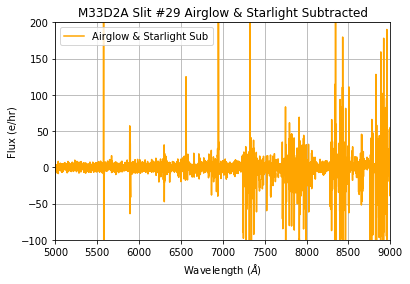

In [44]:
plt.plot(new_wave_600,AGST_Sub_Slit29,label="Airglow & Starlight Sub",color="orange")
plt.xlim(5000,9000)
plt.xlabel("Wavelength ($\AA$)")
plt.ylim(-100,200)
plt.ylabel("Flux (e/hr)")
plt.title("M33D2A Slit #29 Airglow & Starlight Subtracted")
plt.grid(True)
plt.legend()

Voilà! **With starlight contamination removed from our spectra, the continuum looks much better!**

Again, we do this for every spectrum in our mask! 

# Saving FITS Files

Now you know how to read a FITS file on Python, I should then show you how to generate FITS file. Let's go back to our rebinned data and try to save them as FITS files.

First, you need to define some location (i.e. a folder) to store those FITS files. You can manually create the folder and subfolders. If you wish to do it manually, please create a folder titled **SkySubData**, inside that folder create another folder titled **M33D2A_Rebinned**, inside M33D2_Rebinned, create two additional folders named **M33D2A_Excluded** and **M33D2A_Included** on the same workspace as this Notebook. 

OR 

You run the code below to create folders and subfolders using Python codes. 

In [32]:
paths = [#make a folders to store the rebinned data
        "./SkySubData/{0}_Rebinned".format(mask_name),

        #make sub-folders for rebinned data
        "./SkySubData/{0}_Rebinned/{0}_Excluded".format(mask_name),
        "./SkySubData/{0}_Rebinned/{0}_Included".format(mask_name),]
        
for path in paths:
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise

The code will create a folder called **SkySubData**, a subfolder titled **M33D2A_Rebinned**, and two additional subfolders titled **M33D2A_Excluded** and **M33D2A_Included**.

**If you check the inside of M33D2A_Excluded and M33D2A_Included, you will find that it is currently empty**. That makes sense since we haven't added anything to it. Let's save our FITS files inside those subfolders!

## Function to Save The Rebinned Data

You always start out by defining the Primary Header Data Unit, you usually don't really do anything with it. 

Afterward, since you're using BinTable to save your data, you have to tell Python what you want to store in each column (c1, c2, etc.) 

Putting it all together, you call BinTableHDU to construct your table and put all the columns together using from_columns.

You can construct as many HDUs as you wish. After you're done, you have to put all your HDU into a list using HDUList, in this case, we called our list hdul. 

Lastly, using writeto, you define a path where you want Python to store your FITS file + the name of that FITS file.

In [33]:
#Sarthak's function as modified by Liv Gaunt
def exportToFits(rbflux, rbwave, rbivar, mask_name, file_names, incl_or_excl):

    for i in range(len(rbflux)):
            
        hdu1 = fits.PrimaryHDU() #primary HDU (empty)
        hdu1.header['INCLUDE'] = (incl_or_excl, 'Include in median calc if T') #this sets the tag for inclusion
            
        c1 = fits.Column(name='RBFLUX', array=rbflux[i], format='E')
        c2 = fits.Column(name='RBWAVE', array=rbwave, format='E') #no [i] on rbwave since it's just one array
        c3 = fits.Column(name='RBIVAR', array=rbivar[i], format='E')
        hdu2 = fits.BinTableHDU.from_columns([c1, c2, c3]) #first extensional HDU (w data)
            
        hdul = fits.HDUList([hdu1, hdu2]) #combine both HDUs into file and write it below
            
        #this part puts the files to include in one folder, and those to exclude in another
        if incl_or_excl == True:
            hdul.writeto(path_name + '/SkySubData/{0}_Rebinned/{0}_Included'.format(mask_name) + '/' + 'rebinned_{0}'.format(file_names[i]))
            
        elif incl_or_excl == False:
            hdul.writeto(path_name + '/SkySubData/{0}_Rebinned/{0}_Excluded'.format(mask_name) + '/' + 'rebinned_{0}'.format(file_names[i]))


The general structure is something like this:

hdu1 = fits.PrimaryHDU()

(In this area is where you write the codes to store data. So far, I only know two methods you can use to stores data: **BinTableHDU** and **ImageHDU**. Let's go with BinTableHDU for this example)

c1 = fits.Column(name="NAME", array=Variable_To_Save, format='E')

c2 = fits.Column(name="ANOTHER NAME", array=Another_Variable_To_Save, format='E')

...

hdu2 = fits.BinTableHDU.from_columns([c1,c2,...cn])

hdul = fits.HDUList([hdu1,hdu2,...])

hdul.writeto(Path_To_Where_You_Want_To_Save)

In [34]:
exportToFits(rbflux, rbwave, rbivar, mask_name, file_names, True)  
# Save the rebinned flux, wavelength, and inverse variance of slits included in the 
#median calculation process as FITS files
exportToFits(rbflux_exclude, rbwave_exclude, rbivar_exclude, mask_name, file_names_exclude, False)
# Save the rebinned flux, wavelength, and inverse variance of slits excluded in the 
#median calculation process as FITS files

**After you have run these codes to call our function, go check on M33D2A_Excluded and M33D2A_Included**. You now should see that those folders are no longer empty. We have successfully saved our rebinned data as FITS files!

**NOTE**: **Pathing** is the construction of a path to locations inside your computer. 
Is a very useful thing to learn if you want to access and save files in Python. You will need to learn how to construct a path in Python if you want to save FITS files. 

I would recommend looking up some tutorials. Do let me know if you need help, I could help you with constructing paths.

# Cross-correlation and MARZ

Using all of the processes above, at this point, you will have a bunch of rebinned spectra. Those spectra have undergone airglow and starlight subtraction. **Theoretically, the remaining spectra should only contain emissions from our targets**. I said theoretically because our subtraction process is not 100% perfect. No process is ever perfect. So there is still a bit of contamination but not a significant amount.

One of M33's characteristics we are interested in studying is it's kinematics. **Kinematic** is the study of motion. We are interested in studying the movement of ionized gas disks in the Triangulum galaxy. 

Our first objective is to create a **color-coded velocity map**. To do this, we will use a program called **MARZ** to calculate the redshift of individual spectrum. MARZ used a method called **cross-correlation** to calculate the redshift. You can read about cross-correlation here: https://docs.google.com/document/d/16QuhwolhX0URjpyPZ7sfWy107aBuvq3E9-LPyT8Nz68/edit (Is on the last page). Feel free to ask questions if there's something you don't understand. 

Before we can use MARZ, we have to **package our data into a format that MARZ accepts**. You'll have to package your data as a FITS file. Remember before how I said I'll show you the two ways I know how to save data: BinTableHDU and ImageHDU. I'm going to use **ImageHDU** in this example. 

Generally, you'll need four main components: Intensity, Variance, Sky background, and Wavelength. 

In [35]:
def exportToFitsMarz(mask_name,slit_nums,grating,rebinned_flux,rebinned_ivar,median,min_wave,max_wave):
    
    '''
    
    Parameters
    ----------
    mask_name : str, required
        Name of mask.
    slit_nums : list, required
        List of slit number. 
    grating: int, required
        600 or 1200
    rebinned_flux : list, required
        A list containing arrays of rebinned flux. 
    rebinned_ivar: list, required
        A list containing arrays of rebinned inverse 
        variance.
    median: list, required
        Median of all included slits. Sky background.
    min_wave: float or int, required
        Left limit of the wavelength cutout.
    max_wave: float or int, required
        Right limit of the wavelength cutout.

    '''
    
    # GETTING 'WAVELENGTH' 2D ARRAY
    if grating == 600:
        wavelength_array = new_wave_600
    elif grating == 1200:
        wavelength_array = new_wave_1200
        
    wave_cutout_boolean = ((wavelength_array>=min_wave) & (wavelength_array<=max_wave))
    
    array2d_wavelength = [wavelength_array[wave_cutout_boolean]] * len(slit_nums) #duplicating same array by number of excluded slits
    
    
    #GETING 'INTENSITY' 2D ARRAY
    array2d_intensity = [] #empty list to stores rbflux 
    
    for slit in slit_nums: #sky subtraction and moving to empty list
        index = slit_nums.index(slit)
        skysub_spectrum = rebinned_flux[index] - median
#         skysub_spectrum = skysub_spectrum - moving_median(skysub_spectrum-median, size=325)
        skysub_spectrum = skysub_spectrum - moving_median(skysub_spectrum, size=325)
        array2d_intensity.append(np.array(skysub_spectrum)[wave_cutout_boolean])
            
    #GETTING 'VARIANCE' 2D ARRAY
    array2d_variance = [] #empoty list to stores variance
    for inv_var in rebinned_ivar: #getting var from ivar and moving to empty list
        var_list = []
        for value in inv_var:
            if value == 0:
                var_list.append(value)
            else:
                var_list.append(1/value)
        array2d_variance.append(np.asarray(var_list)[wave_cutout_boolean])
        
    #GETTING 'SKY BACKGROUND' 2D ARRAY
    array2d_sky = [np.array(median)[wave_cutout_boolean]] * len(slit_nums) #duplicating same array by number of excluded slits
#     array2d_sky = [np.zeros(len(wavelength_array))[wave_cutout_boolean]] * len(slit_nums)
    
    #WRITE TO FITS
    hdu0 = fits.PrimaryHDU()
    hdu1 = fits.ImageHDU(data=array2d_intensity,name="INTENSITY") #Image HDU containing intensity
    hdu2 = fits.ImageHDU(data=array2d_variance,name="VARIANCE") #Image HDU containing variance
    hdu3 = fits.ImageHDU(data=array2d_sky,name="SKY") #Image HDU containing sky background
    hdu4 = fits.ImageHDU(data=array2d_wavelength,name="WAVELENGTH") #Image HDU containing wavelength
    c1 = fits.Column(name="NAME",array = slit_nums,format="E") 
    hdu5 = fits.BinTableHDU.from_columns([c1]) #BinTable HDU containing info about slits (ex. ID,Dec,RA...)
    #BinTableHDU isn't needed for calculation. It is use to label slits.
    hdul = fits.HDUList([hdu0,hdu1,hdu2,hdu3,hdu4,hdu5])
    hdul.writeto("./SkySubData/{0}_Marz.fits".format(mask_name))

In [36]:
exportToFitsMarz(mask_name,slit_nums_exclude,grating,rbflux_exclude,rbivar_exclude,median,6500,6800)

When you run the code above, it will create a file titled **M33D2A_Marz.fits inside your SkySubData folder**. You can then head over to https://matteofox.github.io/Marz/#/usage (Link to MARZ) where you can upload or drag M33D2A_Marz.fits into the box on the upper left corner outlined by the dash lines. 

When you do that, MARZ will begin to calculate a bunch of different redshifts that it think is the best fit. You should get a screen like this (ignore the red arrows and numbers. Those are my annotation).

![](MARZ_Screen.png)

**NOTE:** The redshift (z) values I have on my screen will be different from your redshift values. This is because I have already calculated them on MARZ so the program is just loading data I previously saved. 

Some important features to notice:

1. Template: Make sure you select the right template. For most spectra, template **8 - Late Type Emission Galaxy** usually gives the best fit. Do feel free to try different template!  
2. Your spectrum: The green spectrum is your data. The red spectrum is the template. 
3. Fitting: You want to identify the H-alpha emission line. It is usually the tallest and most noticeable line in your spectrum, it is also usually around 6562 A. Click on the center of the peak and click on the H$\alpha$. This would move the template so that H-alpha of the template aligns with the H-alpha of your data. This would calculate a new redshift. 
4. After you're satisfied with the fitting and redshift, you have to assign it a QOP. DO NOT ASSIGN A QOP OF 0! It will not save your data (I learn it the hard way:( ). I usually assign 3 if the fitting is really good, 2 if three or four emission lines are visible, and 1 if only one or two emission lines are visible. 


After you're done with one slit, move on to the next. Is pretty simple, after a few slits, you'll get the hang of it! After you're done with the whole mask, you can download the result using the blue Download button. It will save your data as a .mz file. You can read .mz files using the code posted by the developers in the Usage section. 

# Velocity Maps

## Maps Creation

After you have processed all the masks using MARZ. You can then construct a velocity map using sky coordinates and H-alpha velocities. 

The actual construction of the velocity maps and subsequent analyses are pretty long so I won't detail all of them here. You can find them in the **Velocity_Map.ipynb** notebook. 

This is what the completed H-alpha velocity map looks like!

![](Velocity_Map_(QOP>=2).png)

Using HI (H-One(Roman Numeral)) and CO data from previous research, we can also construct two more maps, one for each respectively. 

![](HI_Region.png)
![](CO_Region.png)

One thing we can do with these maps is to identify stars that are shared between these maps and take the difference in their velocities. **Using their differences, we can construct three different maps: H$\alpha$-HI, H$\alpha$-CO, and HI-CO**.

![](H-Alpha-HI.png)
![](H-Alpha-CO.png)
![](HI-CO.png)

You might notice the various lines that appear on these maps. **These lines divide the maps into three regions: north, south, and center**. Any data points above the blue dash line on top belongs to the north region, anything data points below the blue dash line on the bottom belongs to the south region, and anything in the middle of these lines belongs to the center region. **We divide the maps into three regions in order to better account for M33's rotation**. 

## Testing For Lag

One thing we are interested in testing is whether there is any lag between the H$\alpha$ and the HI ionized gas disks. **Lagging** is the difference in the rotational kinematic between these gas disks. During a meeting with Yong Zheng back in April or May, she and Raja suggested two methods we can use to test the degree of lagging: **H$\alpha$-HI vs HI** and **Position-Velocity Diagram**. 

This is what the **H$\alpha$-HI vs HI Diagram** looks like. **Notice how many of the data points make a sort of horizontal trend around 0 km/s**. <br/>
![](Delta_V_vs_HI_V.png)

This is what the **Position-Velocity Diagram** looks like. Here we are plotting the line-of-sight velocity on the y-axis and the projected distance along the semi-major axis on the x-axis. We are basically overlaying H$\alpha$ data points (orange) on top of HI data points (blue). <br/>
![](Position-Velocity_Diagram.png)

What can we tell from these diagrams? **The horizontal trend in the H$\alpha$-HI vs HI Diagram indicates that the degree of lagging is very minimal between the two gas clouds. The result of the Position-Velocity Diagram also supports our conclusion. Notice how the orange cloud sort of almost covers the center blue cloud but is slightly tilted. If the two clouds are perfectly on top, that means there is no lagging but since the orange cloud is a bit tilted, that means there is a bit of lag**. 

# Baldwin, Phillips & Terlevich (BPT) Diagram

One of the projects we are currently working on is something called a BPT Diagram. **We use BPT Diagram to study the spectrum of ionizing sources**. On the **x-axis, you have the ratio of NII/H$\alpha$ and on the y-axis, you have the ratio of OIII/H$\beta$**. Again, NII, H$\alpha$, OIII, and H$\beta$ are emission lines. What we are taking is the ratio of their flux. 


An example BPT Diagram looks something like this.
![](BPT_Diagram_Example.png)


https://www.researchgate.net/figure/The-BPT-diagram-with-our-sample-of-galaxies-plotted-as-grey-dots-The-solid-blue-line-is_fig1_258083510

Our BPT Diagram won't look exactly like this. I don't think we have enough data points to make it this detailed but it will be similar. 

We don't really have a complete BPT Diagram. We have produced one but is incorrect so we will need to revise our code. I'll attach the BPT Diagram we produce below (NOT FINAL RESULT!).

![](BPT_Diagram.png)

**One of the first things we'll focus on is producing a correct BPT Diagram. It'll be challenging but I'm looking forward to working with and learning from all of you this summer!**